## Example 1 — Linear Regression with One Parameter (No Bias)

**Problem setup (inputs / outputs)**  
We have data points $(x_i, y_i)$ for $i=1,\dots,N$.  
- **Input:** $x$ (feature)  
- **Output:** $y$ (target)  
- **Model:** $\hat{y}_i = w\,x_i$, where $w$ is the parameter to learn.

---

### Objective (Loss Function)
We use **Mean Squared Error (MSE):**

$$
L(w) = \frac{1}{N} \sum_{i=1}^N (y_i - w x_i)^2
$$

---

### Gradient (Derivative of the Loss)

$$
\frac{dL}{dw} = -\frac{2}{N} \sum_{i=1}^N x_i \, (y_i - w x_i)
$$

---

### Gradient Descent — Update Rule

At iteration $t$, we update $w$ by stepping opposite to the gradient:

$$
w^{(t+1)} = w^{(t)} - \eta \, \frac{dL}{dw}\bigg|_{w^{(t)}}
$$

where $\eta > 0$ is the **learning rate**.

---

### Notes on Practice
- Initialize $w^{(0)}$ (e.g., random or small value).  
- Choose $\eta$ carefully: too large → divergence; too small → slow convergence.  
- The loss $L(w)$ is **convex** in $w$, so gradient descent converges to the **global minimum**.  

---

### Visualization Meaning
- **Left panel:** Data points + evolving line $\hat y = w x$.  
- **Middle panel:** Full loss curve across epochs (current loss shown in red).  
- **Right panel:** Loss landscape $L(w)$ (a parabola) showing the descent trajectory.


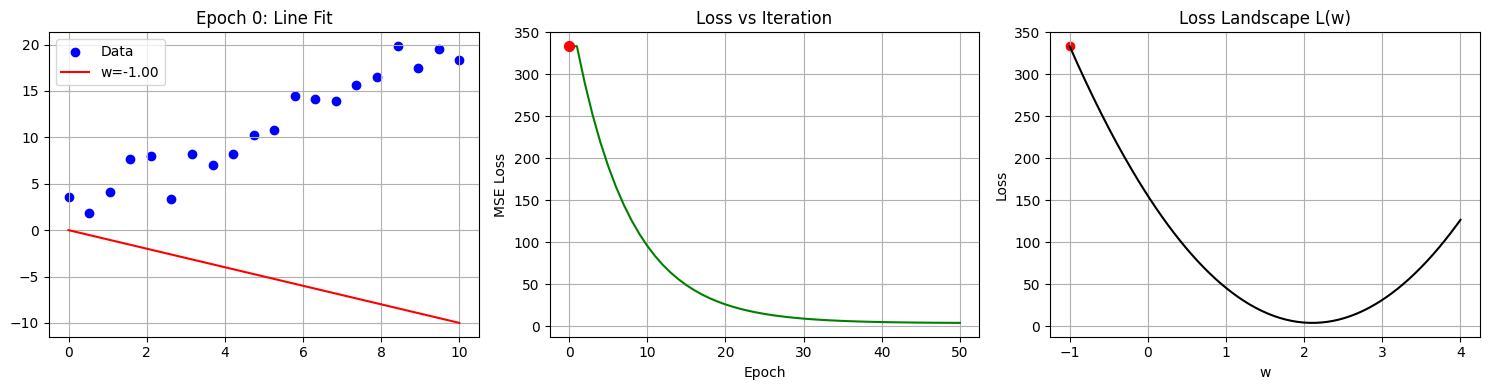

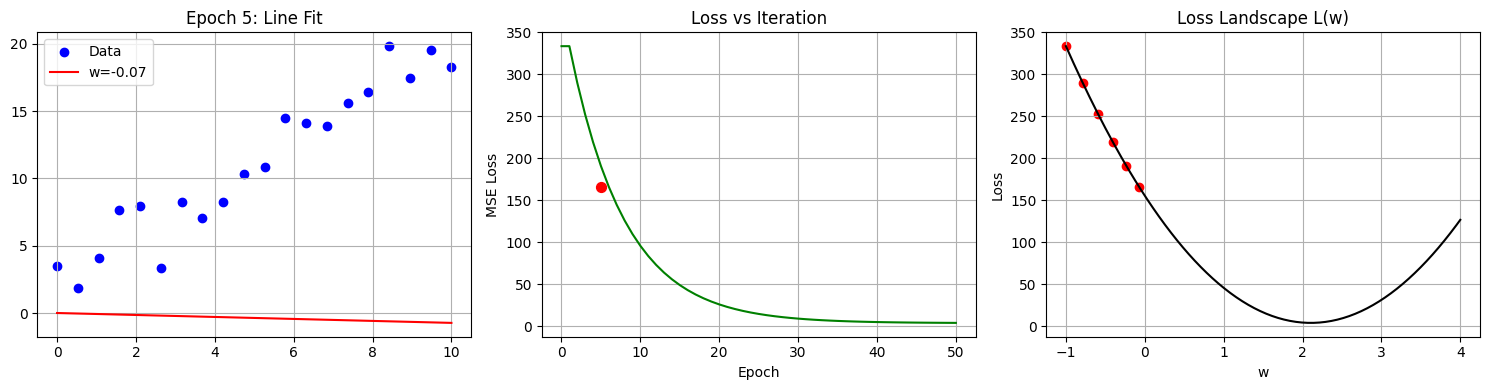

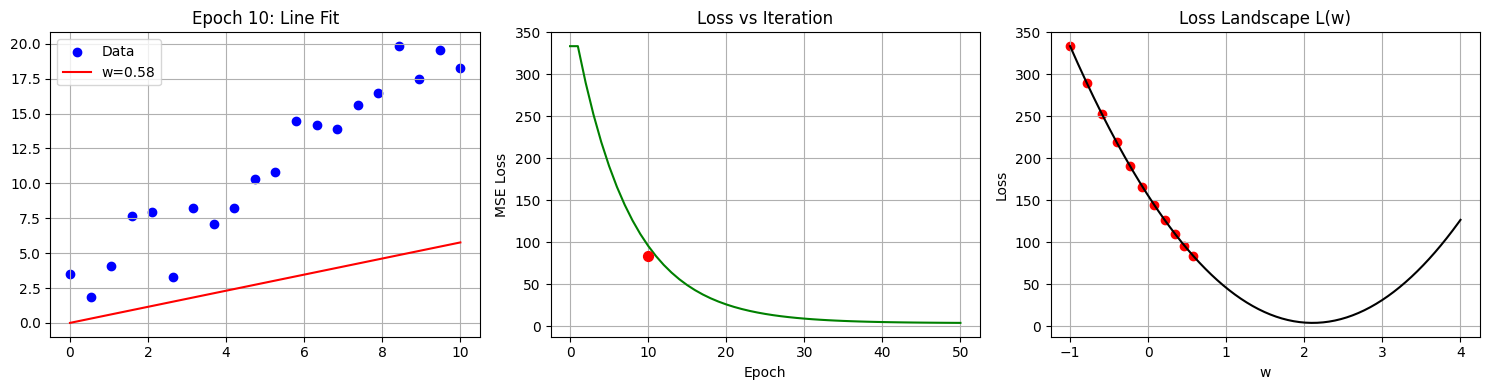

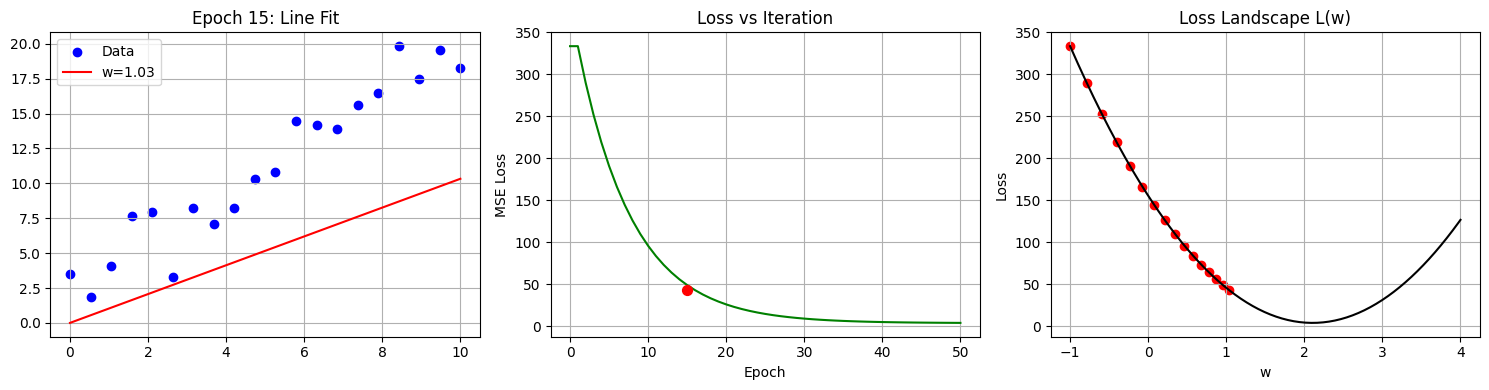

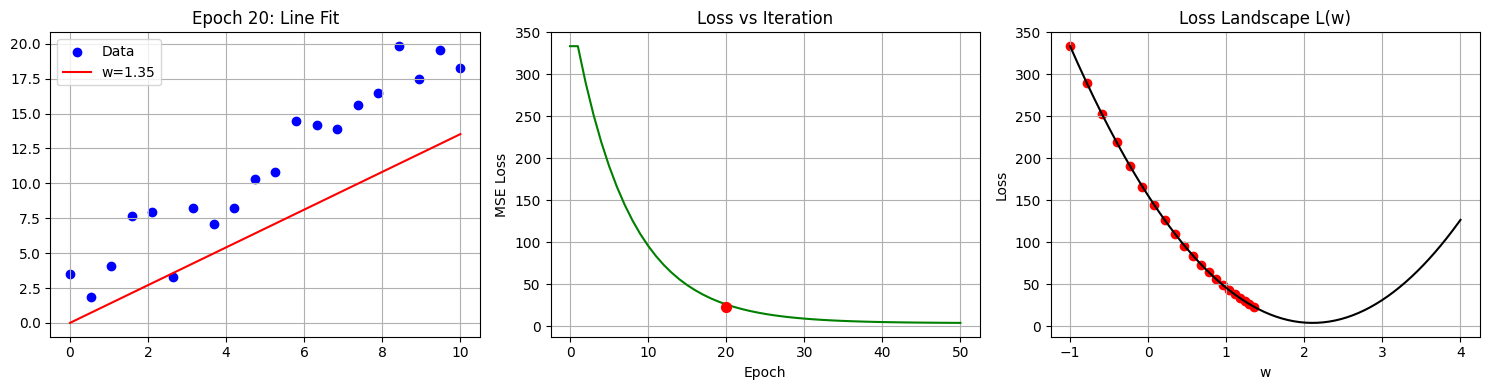

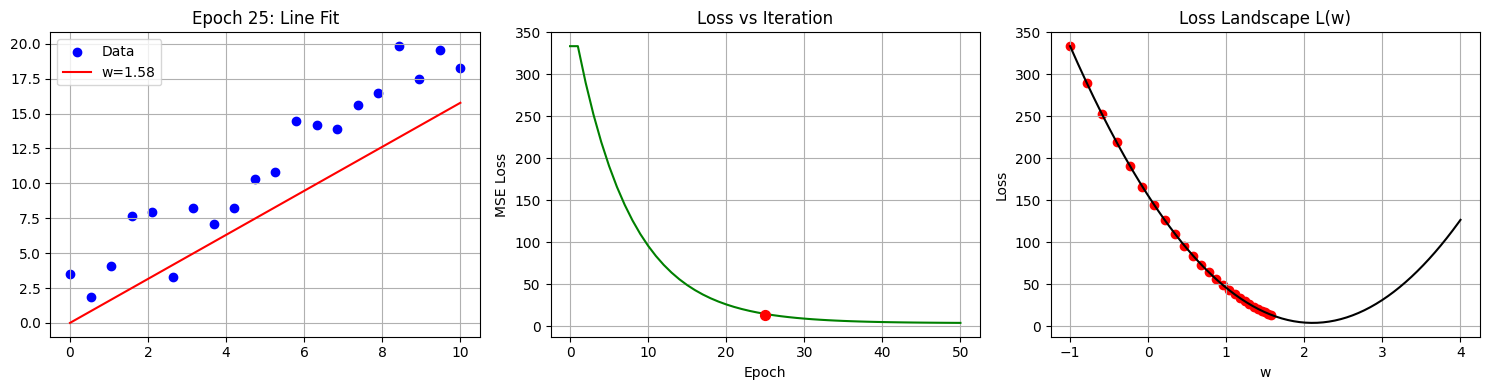

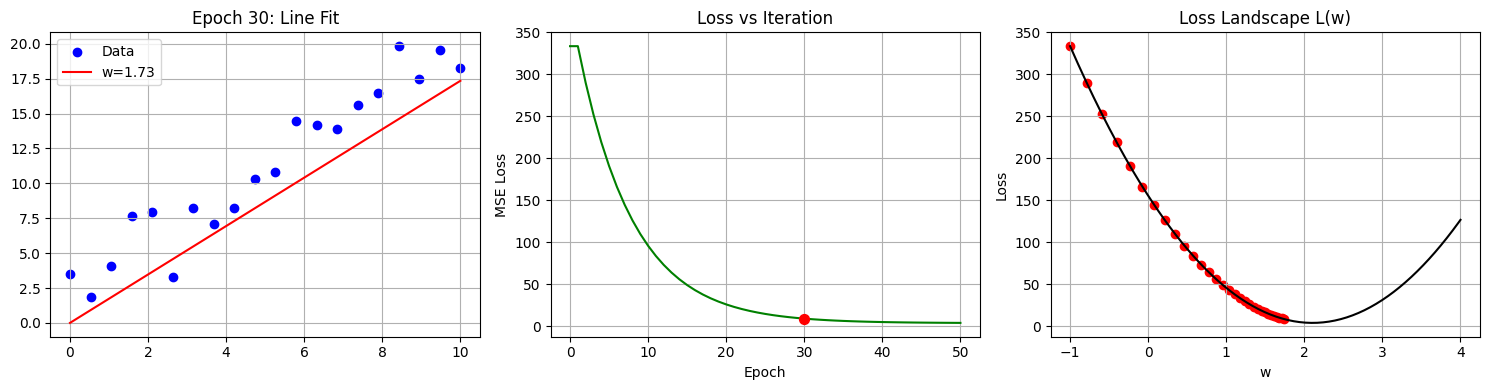

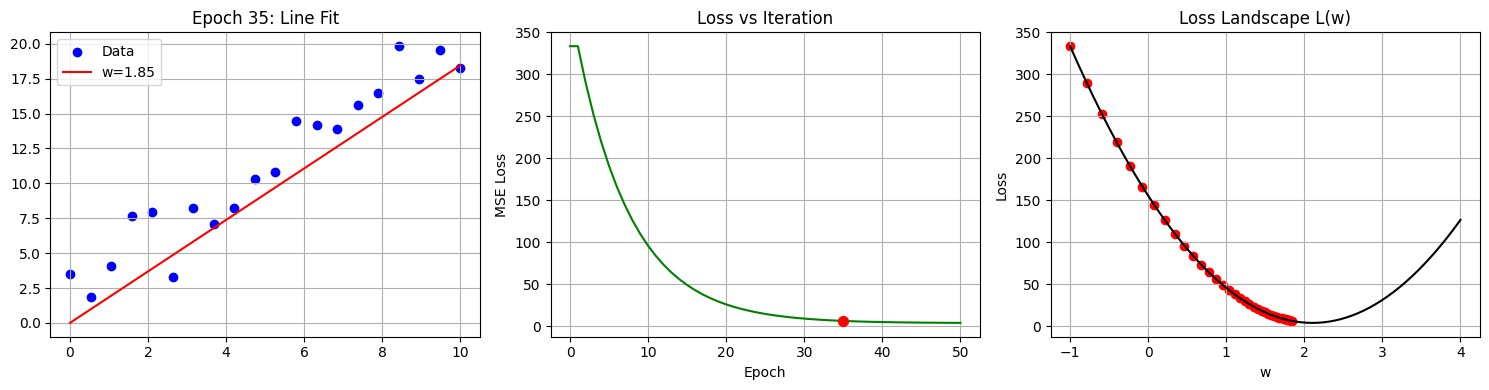

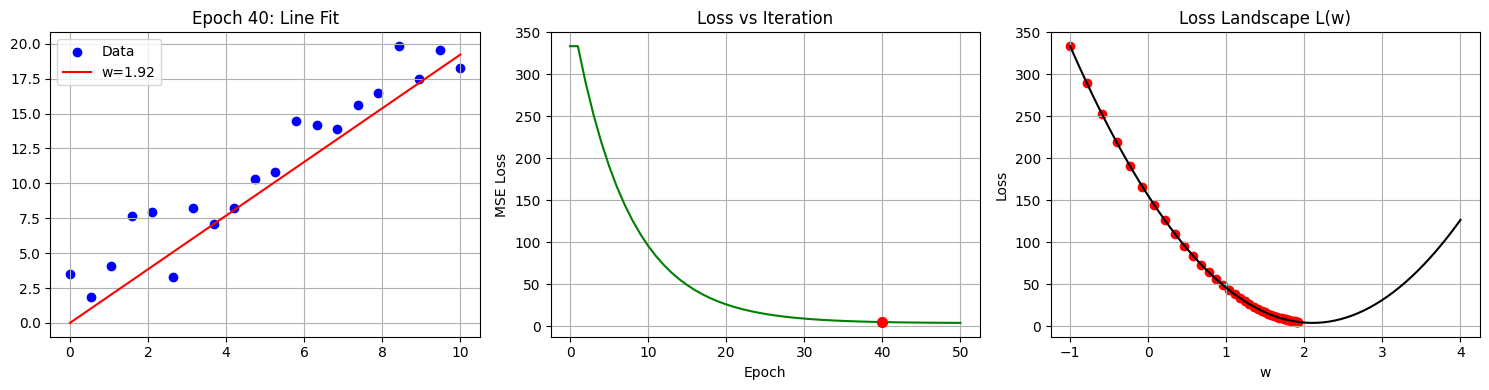

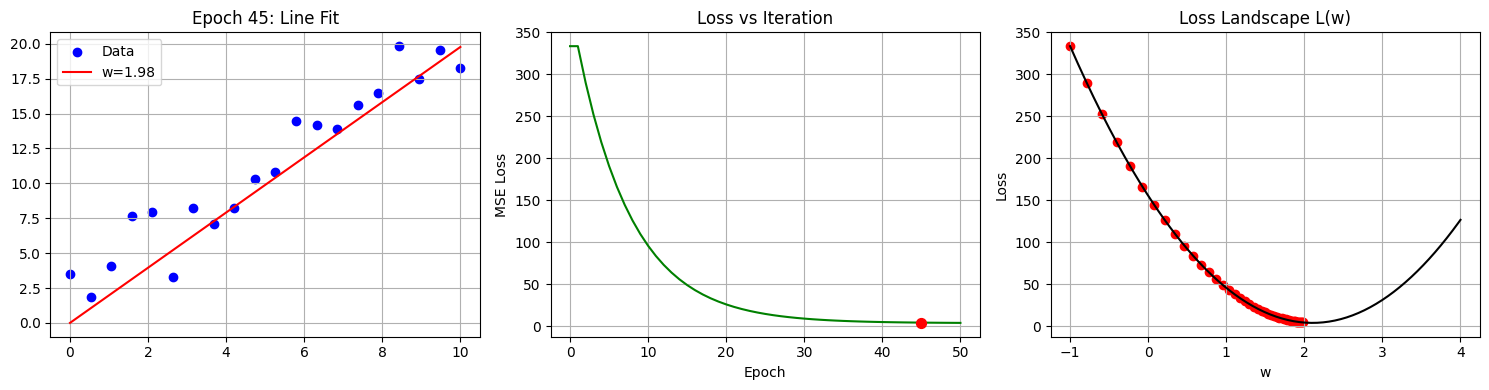

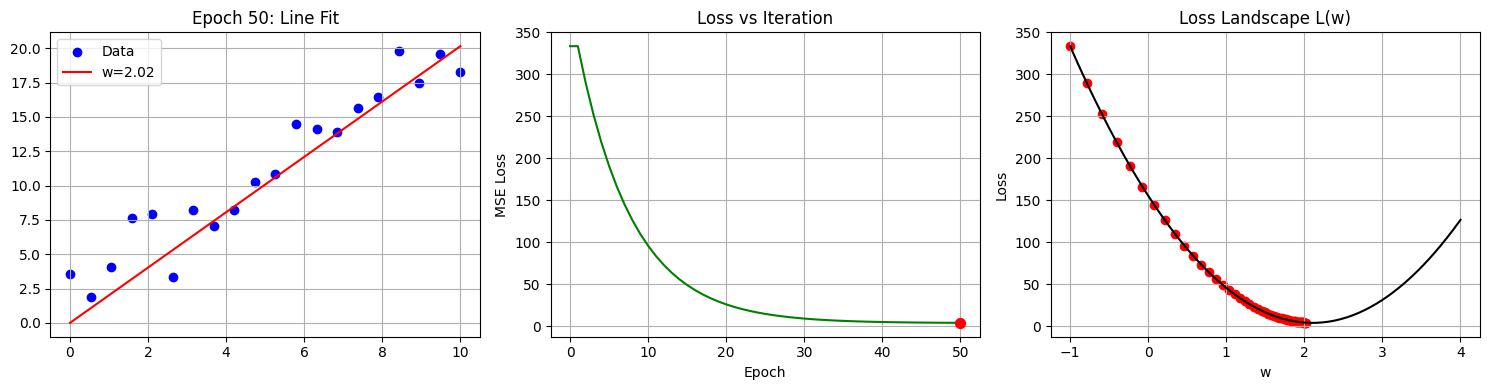

🎬 Animation saved as '/content/gd_1D_animation.mp4'


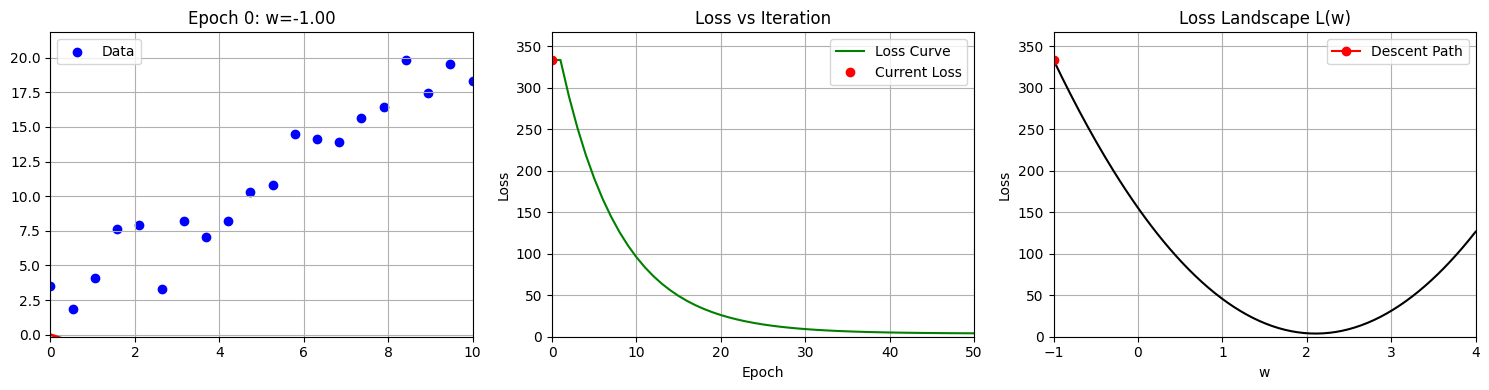

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# ====================================================
# 1. Generate synthetic simple linear data (no bias)
# ====================================================
np.random.seed(0)
x = np.linspace(0, 10, 20)
true_w = 2.0
y = true_w * x + np.random.normal(0, 2, size=x.shape)

# ====================================================
# 2. Initialize parameters
# ====================================================
w = -1.0   # initial guess
eta = 0.001
epochs = 50

# ====================================================
# 3. Gradient Descent
# ====================================================
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

w_history = [w]
loss_history = [mse(y, w * x)]

for epoch in range(epochs):
    y_pred = w * x
    error = y - y_pred
    grad = -(2/len(x)) * np.sum(x * error)
    w -= eta * grad
    loss = mse(y, y_pred)
    w_history.append(w)
    loss_history.append(loss)

# ====================================================
# 4. Precompute loss landscape (parabola)
# ====================================================
w_range = np.linspace(-1, 4, 200)
loss_curve = [mse(y, w_val * x) for w_val in w_range]

# ====================================================
# 5. Static Snapshots every 5 epochs
# ====================================================
for i, w_i in enumerate(w_history):
    if i % 5 == 0 or i == len(w_history)-1:
        loss_i = mse(y, w_i * x)
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        # (1) Data fit
        axes[0].scatter(x, y, color="blue", label="Data")
        axes[0].plot(x, w_i * x, color="red", label=f"w={w_i:.2f}")
        axes[0].set_title(f"Epoch {i}: Line Fit")
        axes[0].legend()
        axes[0].grid(True)

        # (2) Loss vs iteration
        axes[1].plot(range(len(loss_history)), loss_history, color="green")
        axes[1].scatter(i, loss_i, color="red", s=50, zorder=5)
        axes[1].set_title("Loss vs Iteration")
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("MSE Loss")
        axes[1].grid(True)

        # (3) Loss landscape
        axes[2].plot(w_range, loss_curve, color="black")
        axes[2].scatter(w_history[:i+1],
                        [mse(y, wv * x) for wv in w_history[:i+1]],
                        color="red")
        axes[2].set_title("Loss Landscape L(w)")
        axes[2].set_xlabel("w")
        axes[2].set_ylabel("Loss")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

# ====================================================
# 6. Animation
# ====================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# (1) Line fit
axes[0].scatter(x, y, color="blue", label="Data")
line, = axes[0].plot([], [], color="red", lw=2)
title1 = axes[0].set_title("Epoch 0: Line Fit")
axes[0].legend()
axes[0].grid(True)
axes[0].set_xlim(x.min(), x.max())
axes[0].set_ylim(y.min()-2, y.max()+2)

# (2) Loss vs iteration
axes[1].plot(range(len(loss_history)), loss_history, color="green", label="Loss Curve")
current_point, = axes[1].plot([], [], 'ro', label="Current Loss")
axes[1].set_xlim(0, epochs)
axes[1].set_ylim(0, max(loss_history)*1.1)
axes[1].set_title("Loss vs Iteration")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True)

# (3) Loss landscape
axes[2].plot(w_range, loss_curve, color="black")
traj, = axes[2].plot([], [], 'ro-', label="Descent Path")
axes[2].set_xlim(w_range.min(), w_range.max())
axes[2].set_ylim(0, max(loss_curve)*1.1)
axes[2].set_title("Loss Landscape L(w)")
axes[2].set_xlabel("w")
axes[2].set_ylabel("Loss")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()

# ---- Update function for animation ----
def update(frame):
    w = w_history[frame]
    y_pred = w * x

    # (1) Line fit
    line.set_data(x, y_pred)
    title1.set_text(f"Epoch {frame}: w={w:.2f}")

    # (2) Loss curve
    current_point.set_data([frame], [loss_history[frame]])

    # (3) Loss landscape path
    traj.set_data(w_history[:frame+1],
                  [mse(y, wv * x) for wv in w_history[:frame+1]])

    return line, current_point, traj, title1

# ---- Create animation ----
ani = animation.FuncAnimation(fig, update, frames=len(w_history),
                              interval=150, blit=False, repeat=False)

# ---- Save animation ----
ani.save("/content/gd_1D_animation.mp4", writer="ffmpeg", fps=10)
print("🎬 Animation saved as '/content/gd_1D_animation.mp4'")

HTML(ani.to_html5_video())

## Example 2 — Linear Regression with Two Parameters (Weight and Bias)

**Problem setup**  
We have data points $(x_i, y_i)$ for $i=1,\dots,N$.  
- **Input:** $x$  
- **Output:** $y$  
- **Model:** $\hat{y}_i = w\,x_i + b$  
  with parameters $w$ (weight) and $b$ (bias).

---

### Objective (Loss Function)

$$
L(w,b) = \frac{1}{N} \sum_{i=1}^N \big(y_i - (w x_i + b)\big)^2
$$

---

### Gradients (Partial Derivatives)

$$
\frac{\partial L}{\partial w} = -\frac{2}{N} \sum_{i=1}^N x_i \big(y_i - (w x_i + b)\big)
$$

$$
\frac{\partial L}{\partial b} = -\frac{2}{N} \sum_{i=1}^N \big(y_i - (w x_i + b)\big)
$$

---

### Gradient Descent Updates

$$
\begin{aligned}
w^{(t+1)} &= w^{(t)} - \eta \, \frac{\partial L}{\partial w}\Big|_{(w^{(t)}, b^{(t)})} \\
b^{(t+1)} &= b^{(t)} - \eta \, \frac{\partial L}{\partial b}\Big|_{(w^{(t)}, b^{(t)})}
\end{aligned}
$$

---

### Vectorized Form (Compact Representation)

Define  
$$
\theta =
\begin{bmatrix}
w \\[4pt] b
\end{bmatrix},
\qquad
X =
\begin{bmatrix}
x_1 & 1\\
\vdots & \vdots\\
x_N & 1
\end{bmatrix}
$$

Predictions: $\hat{\mathbf{y}} = X\theta$  
Gradient:

$$
\nabla_\theta L(\theta) = -\frac{2}{N} X^\top (\mathbf{y} - X\theta)
$$

Update rule:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta L(\theta^{(t)})
$$

---

### Notes on Practice
- **Normalization:** Normalizing $x$ (zero mean, unit variance) improves convergence.  
- **Learning rates:** $w$ and $b$ may require different scales.  
- The loss $L(w,b)$ is convex — gradient descent always moves toward the global minimum.  

---

### Visualization Meaning
- **Left panel:** Data points and fitted line $\hat y = w x + b$ over epochs.  
- **Middle panel:** Loss vs. epochs (green curve) with current loss in red.  
- **Right panel:** 3D loss surface $L(w,b)$ with the trajectory $(w,b,L)$ shown in red.

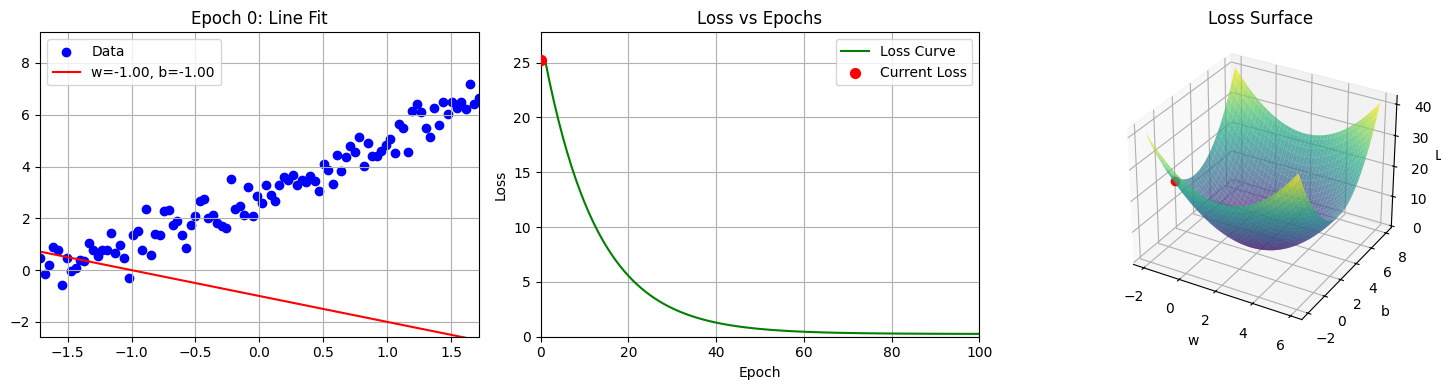

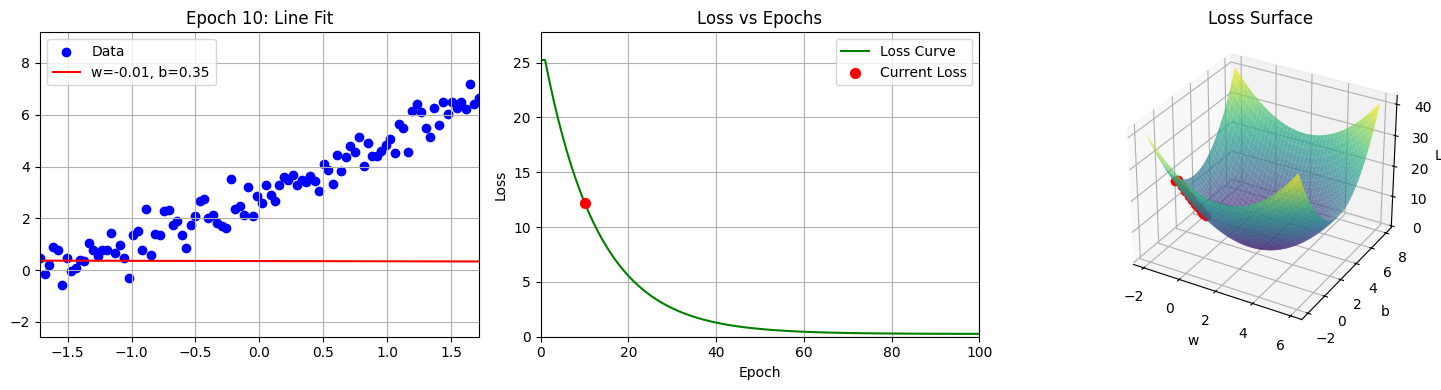

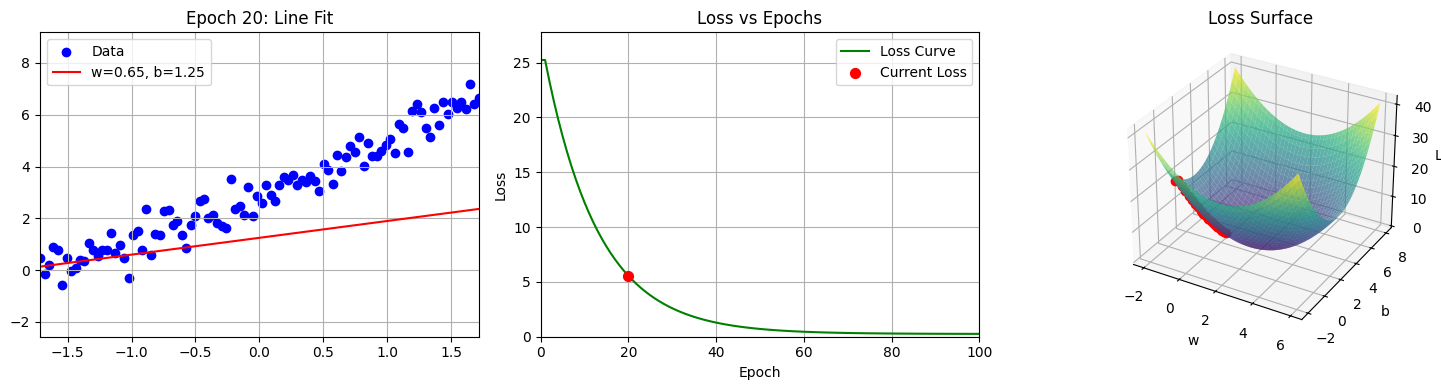

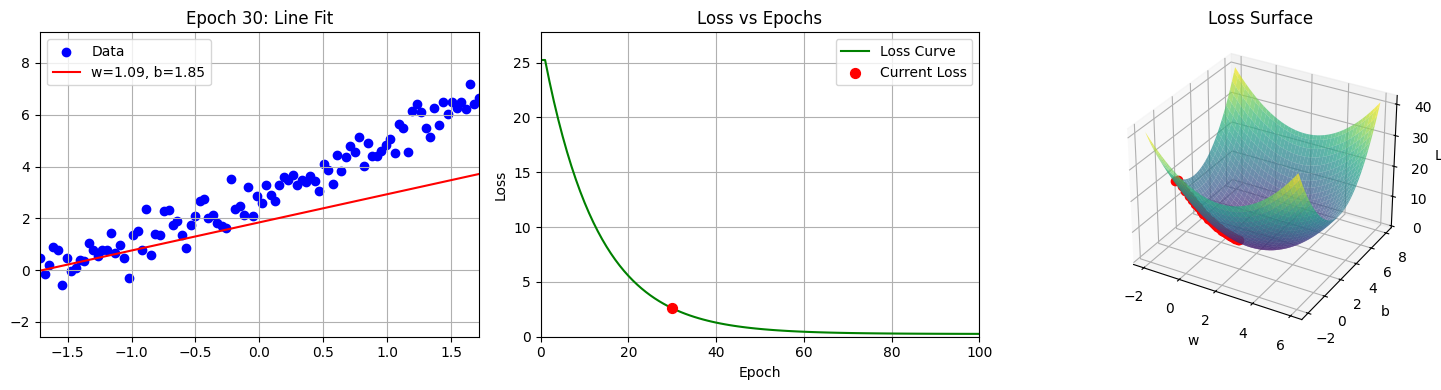

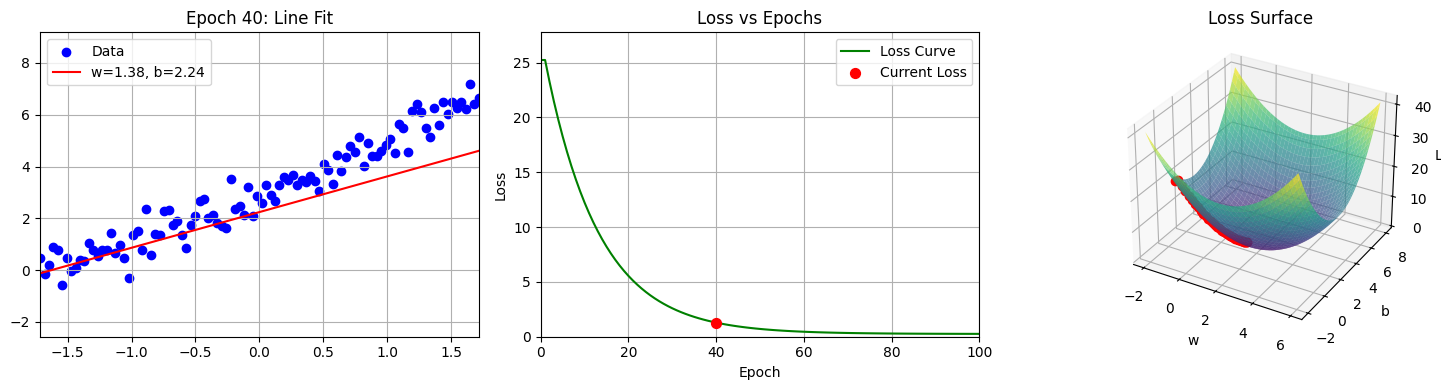

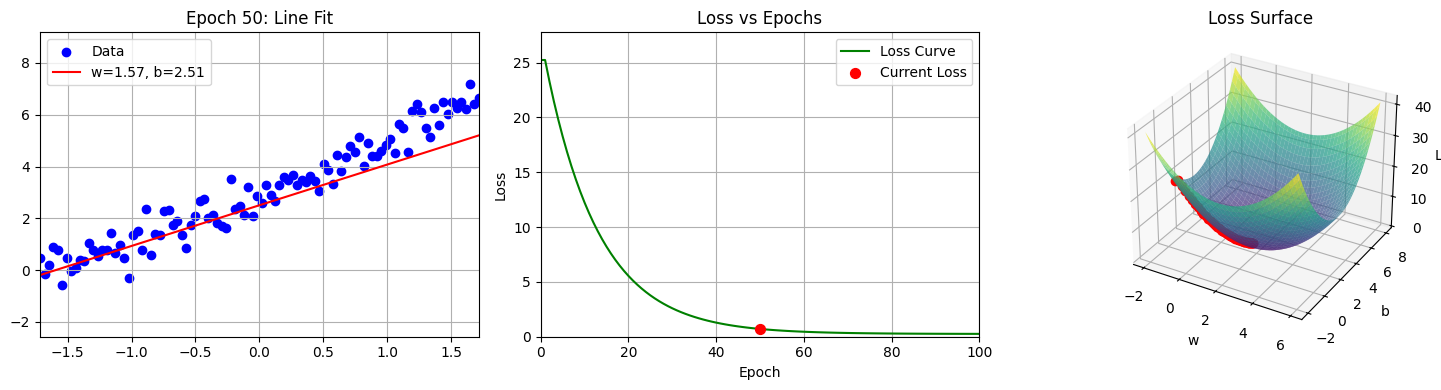

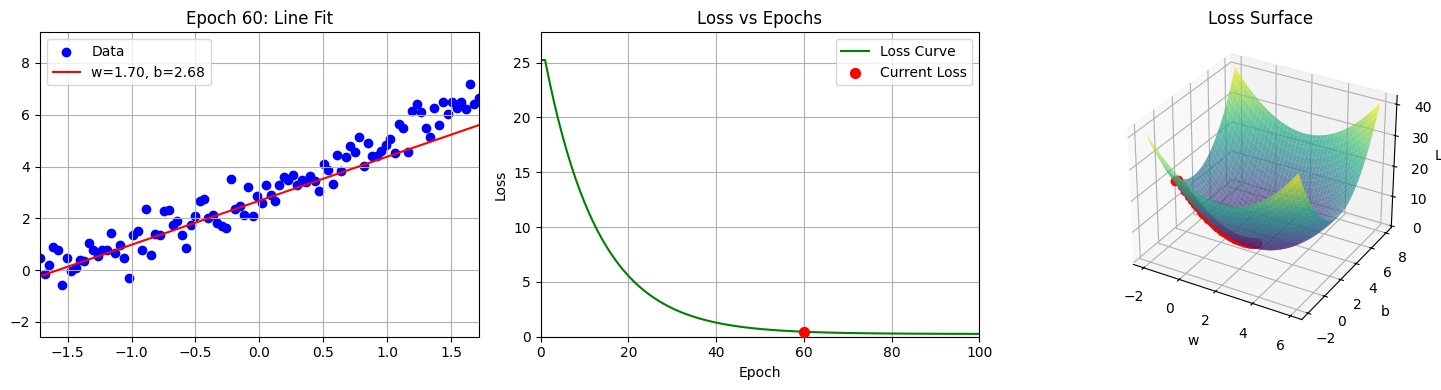

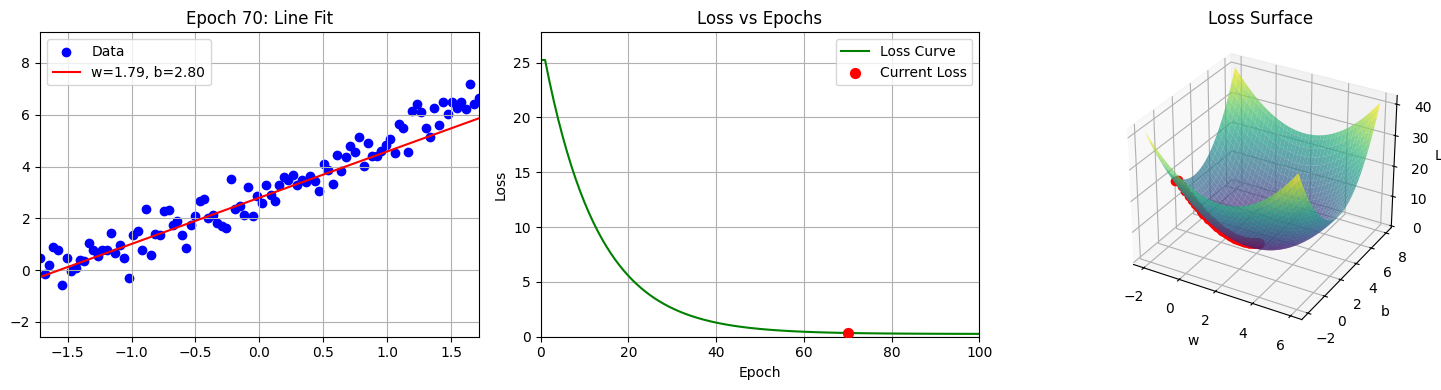

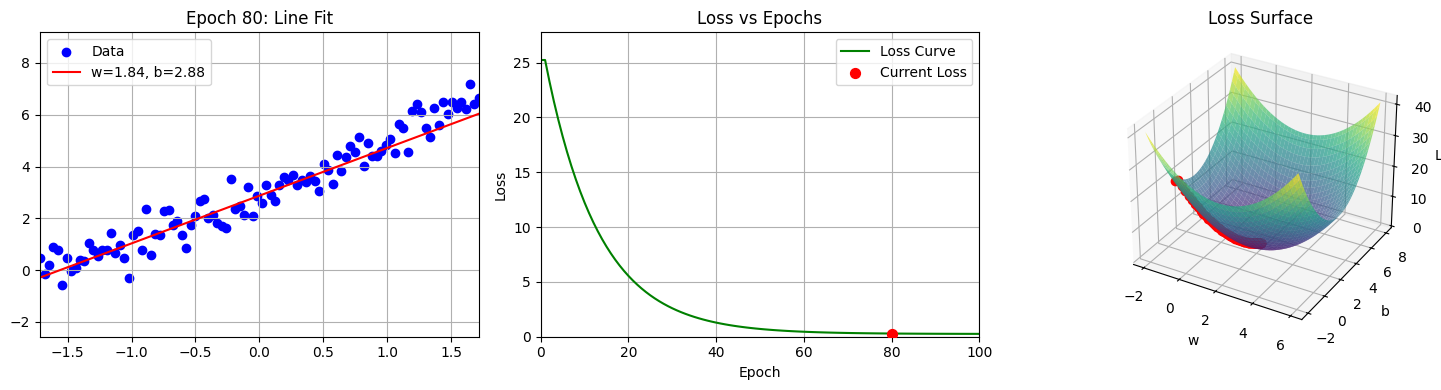

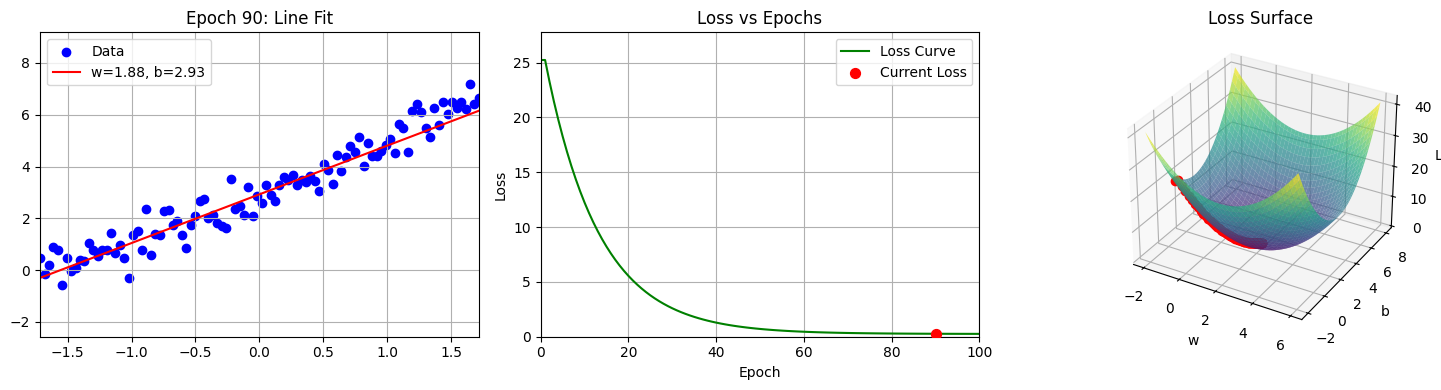

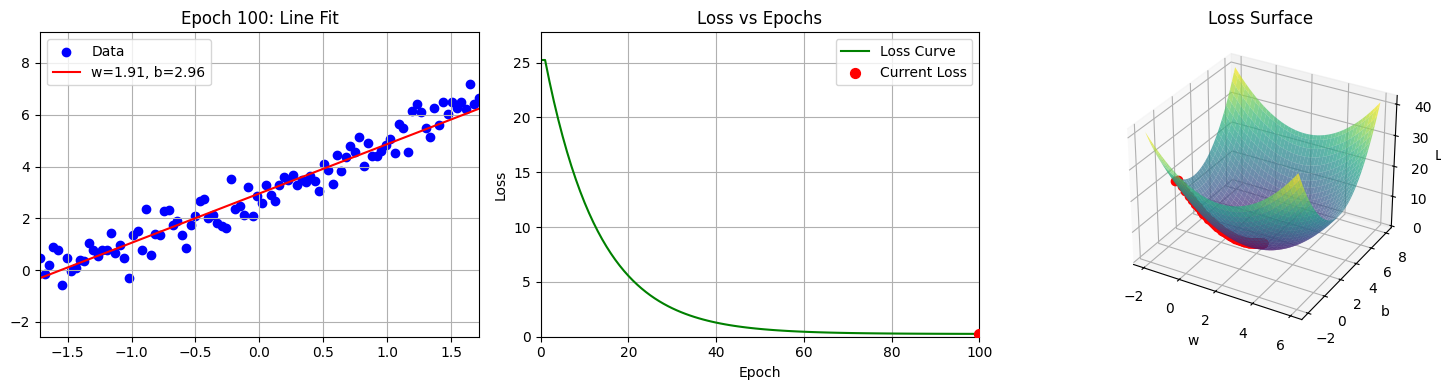

🎬 Animation saved as '/content/gradient_descent_full_view.mp4'


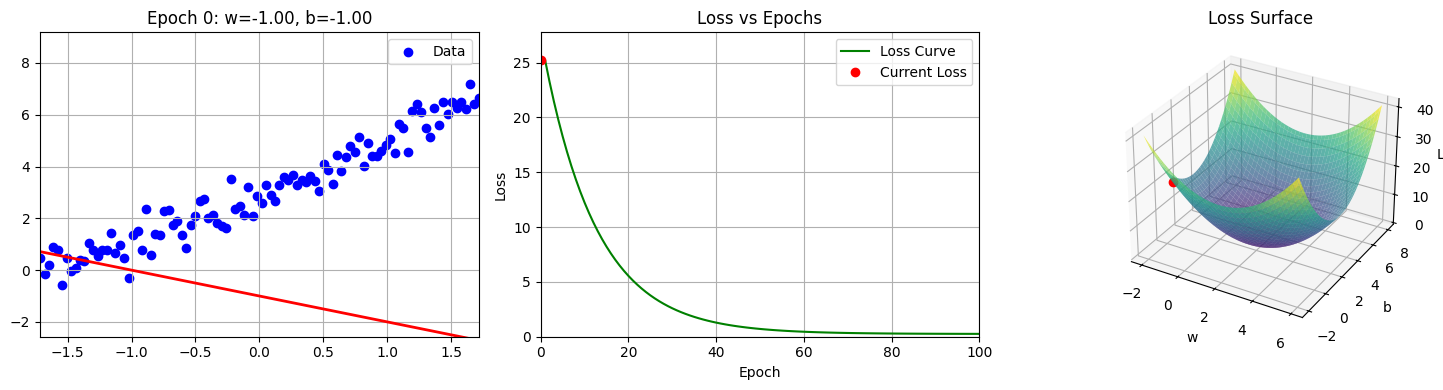

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# ====================================================
# 1. Generate synthetic linear data
# ====================================================
np.random.seed(0)
x = np.linspace(-5, 5, 100)
x = (x - np.mean(x)) / np.std(x)   # normalize before generating y
true_w, true_b = 2.0, 3.0
y = true_w * x + true_b + np.random.randn(len(x)) * 0.5

# ====================================================
# 2. Initialize parameters
# ====================================================
w, b = -1.0, -1.0
lr = 0.02
epochs = 100

# ====================================================
# 3. Gradient Descent
# ====================================================
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

w_history, b_history, loss_history = [w], [b], [mse(y, w * x + b)]

for epoch in range(epochs):
    y_pred = w * x + b
    error = y - y_pred
    dw = (-2/len(x)) * np.sum(x * error)
    db = (-2/len(x)) * np.sum(error)
    w -= lr * dw
    b -= lr * db
    loss = mse(y, y_pred)
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss)

# ====================================================
# 4. Precompute loss surface (bowl shape)
# ====================================================
W = np.linspace(-2, 6, 80)
B = np.linspace(-2, 8, 80)
W, B = np.meshgrid(W, B)
Loss = np.array([[mse(y, w_ * x + b_) for w_, b_ in zip(row_w, row_b)]
                 for row_w, row_b in zip(W, B)])

# ====================================================
# 5. Static Snapshots Every 10 Epochs
# ====================================================
for i in range(0, epochs+1, 10):
    fig = plt.figure(figsize=(15, 4))

    # ---- Plot 1: Line Fit ----
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.scatter(x, y, color="blue", label="Data")
    ax1.plot(x, w_history[i] * x + b_history[i], color="red",
             label=f"w={w_history[i]:.2f}, b={b_history[i]:.2f}")
    ax1.set_title(f"Epoch {i}: Line Fit")
    ax1.legend()
    ax1.grid(True)
    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min()-2, y.max()+2)

    # ---- Plot 2: Loss Curve ----
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(range(len(loss_history)), loss_history, color="green", label="Loss Curve")
    if i < len(loss_history):
        ax2.scatter(i, loss_history[i], color="red", s=50, zorder=5, label="Current Loss")
    ax2.set_xlim(0, epochs)
    ax2.set_ylim(0, max(loss_history)*1.1)
    ax2.set_title("Loss vs Epochs")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.legend()
    ax2.grid(True)

    # ---- Plot 3: 3D Loss Surface ----
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    # Make 3D plot fill more space within its subplot
    ax3.set_box_aspect((1, 1, 0.8))  # (x, y, z) aspect ratio
    fig.subplots_adjust(wspace=0.25, left=0.05, right=0.98, bottom=0.1, top=0.9)
    ax3.plot_surface(W, B, Loss, cmap='viridis', alpha=0.7)
    ax3.plot(w_history[:i+1], b_history[:i+1], loss_history[:i+1],
             color='red', marker='o', label='Descent Path')
    ax3.set_xlabel("w")
    ax3.set_ylabel("b")
    ax3.set_zlabel("Loss")
    ax3.set_title("Loss Surface")
    plt.tight_layout()
    plt.show()

# ====================================================
# 6. Animation with 3 synchronized panels
# ====================================================
fig = plt.figure(figsize=(15, 4))

# ---- (1) Line Fit ----
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x, y, color="blue", label="Data")
line, = ax1.plot([], [], color="red", lw=2)
title1 = ax1.set_title("Epoch 0: Line Fit")
ax1.legend()
ax1.grid(True)
ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min()-2, y.max()+2)

# ---- (2) Loss Curve ----
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(range(len(loss_history)), loss_history, color="green", label="Loss Curve")
current_point, = ax2.plot([], [], 'ro', label="Current Loss")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, max(loss_history)*1.1)
ax2.set_title("Loss vs Epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# ---- (3) 3D Loss Surface ----
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(W, B, Loss, cmap="viridis", alpha=0.7)
traj, = ax3.plot([], [], [], color='red', marker='o', label='Descent Path')
ax3.set_xlabel("w")
ax3.set_ylabel("b")
ax3.set_zlabel("Loss")
ax3.set_title("Loss Surface")
plt.tight_layout()

# ---- Update Function ----
def update(frame):
    w, b = w_history[frame], b_history[frame]
    y_pred = w * x + b

    # (1) Update line fit and title
    line.set_data(x, y_pred)
    title1.set_text(f"Epoch {frame}: w={w:.2f}, b={b:.2f}")

    # (2) Update loss point
    current_point.set_data([frame], [loss_history[frame]])

    # (3) Update 3D path
    traj.set_data(w_history[:frame+1], b_history[:frame+1])
    traj.set_3d_properties(loss_history[:frame+1])

    return line, current_point, traj, title1

# ---- Create Animation ----
ani = animation.FuncAnimation(fig, update, frames=len(loss_history),
                              interval=150, blit=False, repeat=False)

# ---- Save Animation ----
ani.save("/content/gradient_descent_full_view.mp4", writer="ffmpeg", fps=10)
print("🎬 Animation saved as '/content/gradient_descent_full_view.mp4'")

HTML(ani.to_html5_video())